# Auto3D Features
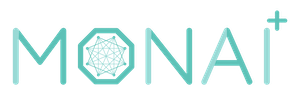

## 0. Installation (to-be-removed after PR is approved)

```bash
git clone https://github.com/mingxin-zheng/MONAI.git && cd monai
git checkout auto3d-1.0
python setup.py develop
```

## 1. Quick Start (WIP)

### 1.1 Training models

```python
from monai.apps.auto3d.auto_runner import AutoRunner

dataroot = '/data/Task04_Hippocampus'  # data directory
datalist = './examples/msd_task04_hippocampus_folds.json'  # training/validation/fold splits 
runner = AutoRunner(dataroot, datalist)
infer_path = runner.run()  # use all default settings
```

### 1.2 Inference the model ensemble (WIP)

### 1.3 Configure basic settings (WIP)

```python
runner = AutoRunner(dataroot, datalist, multigpu=True)
runner = AutoRunner(dataroot, datalist, modality="MRI")
runner = AutoRunner(dataroot, datalist, output_path="./test1")
```

### 1.4 Configure Auto3D modules in Python (WIP)
```python
from monai.apps.auto3d.auto_runner import AutoRunner

runner = AutoRunner(
    input="tasks/Task04_Hippocampus/input.yaml",
    workdir="tasks/Task04_Hippocampus",
    analyzer=True,
    configure=True,
    train=True,
    ensemble=True,
    reset=True,
)
runner.run()
```

### 1.5 Bash script compatibility for development & research

```bash
#!/bin/bash
CONFIG="tasks/Task04_Hippocampus/input.yaml"
WORKDIR="tasks/Task04_Hippocampus"

python monai/apps/auto3d/auto_runner.py --input "${CONFIG}" \
                                        --workdir "{WORKDIR}" \
                                        --analyze \
                                        --configure \
                                        --train \
                                        --ensemble \
                                        --reset
```

### 1.6 Configure network search/optimization settings (WIP)

```python
import numpy as np

runner = AutoRunner(dataroot, datalist)

infer_path = runner.run({'networks': ["unet", "segresnet"]})
infer_path = runner.run({'learning_rate': np.arange(0,0.01,0.002)}) 
```

## 2 Configure modules on a simulated dataset
### 2.1 Simulate a dataset and Auto3D datalist using MONAI functions

#### 2.1.1 Create a datalist for the simulated datasets

In [1]:
sim_datalist = {
    "testing": [
        {"image": "val_001.fake.nii.gz"},
        {"image": "val_002.fake.nii.gz"},
        {"image": "val_003.fake.nii.gz"},
        {"image": "val_004.fake.nii.gz"},
        {"image": "val_005.fake.nii.gz"},
    ],
    "training": [
        {"fold": 0, "image": "tr_image_001.fake.nii.gz", "label": "tr_label_001.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_002.fake.nii.gz", "label": "tr_label_002.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_003.fake.nii.gz", "label": "tr_label_003.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_004.fake.nii.gz", "label": "tr_label_004.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_005.fake.nii.gz", "label": "tr_label_005.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_006.fake.nii.gz", "label": "tr_label_006.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_007.fake.nii.gz", "label": "tr_label_007.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_008.fake.nii.gz", "label": "tr_label_008.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_009.fake.nii.gz", "label": "tr_label_009.fake.nii.gz"},
        {"fold": 0, "image": "tr_image_010.fake.nii.gz", "label": "tr_label_010.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_006.fake.nii.gz", "label": "tr_label_006.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_007.fake.nii.gz", "label": "tr_label_007.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_008.fake.nii.gz", "label": "tr_label_008.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_009.fake.nii.gz", "label": "tr_label_009.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_010.fake.nii.gz", "label": "tr_label_010.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_011.fake.nii.gz", "label": "tr_label_011.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_012.fake.nii.gz", "label": "tr_label_012.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_013.fake.nii.gz", "label": "tr_label_013.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_014.fake.nii.gz", "label": "tr_label_014.fake.nii.gz"},
        {"fold": 1, "image": "tr_image_015.fake.nii.gz", "label": "tr_label_015.fake.nii.gz"},
    ],
}

#### 2.1.2 Function to generate image data

In [2]:
import tempfile
import nibabel as nib
import numpy as np

import os
from monai.data import create_test_image_3d

def simulate():
    test_dir = tempfile.TemporaryDirectory()
    dataroot = test_dir.name

    # Generate a fake dataset
    for d in sim_datalist["testing"] + sim_datalist["training"]:
        im, seg = create_test_image_3d(39, 47, 46, rad_max=10)
        nib_image = nib.Nifti1Image(im, affine=np.eye(4))
        image_fpath = os.path.join(dataroot, d["image"])
        nib.save(nib_image, image_fpath)

        if "label" in d:
            nib_image = nib.Nifti1Image(seg, affine=np.eye(4))
            label_fpath = os.path.join(dataroot, d["label"])
            nib.save(nib_image, label_fpath)
    
    return dataroot, test_dir

dataroot, test_dir = simulate()
print(dataroot)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/tmpzoqv7s0z


#### 2.1.3 Run the DataAnalyzer (PR #4765)

In [3]:
from monai.apps.auto3d.data_analyzer import DataAnalyzer

analyser = DataAnalyzer(sim_datalist, dataroot)
datastat = analyser.get_all_case_stats()
print(datastat)

100%|██████████| 20/20 [00:00<00:00, 21.87it/s]


{'stats_summary': {'image_stats': {'shape': {'max': [[47, 39, 46]], 'mean': [[47.0, 39.0, 46.0]], 'median': [[47.0, 39.0, 46.0]], 'min': [[47, 39, 46]], 'percentile_00_5': [[47, 39, 46]], 'percentile_10_0': [[47, 39, 46]], 'percentile_90_0': [[47, 39, 46]], 'percentile_99_5': [[47, 39, 46]], 'stdev': [[0.0, 0.0, 0.0]]}, 'channels': {'max': 1, 'mean': 1.0, 'median': 1.0, 'min': 1, 'percentile_00_5': 1, 'percentile_10_0': 1, 'percentile_90_0': 1, 'percentile_99_5': 1, 'stdev': 0.0}, 'cropped_shape': {'max': [[47, 33, 39]], 'mean': [[47.0, 33.0, 39.0]], 'median': [[47.0, 33.0, 39.0]], 'min': [[47, 33, 39]], 'percentile_00_5': [[47, 33, 39]], 'percentile_10_0': [[47, 33, 39]], 'percentile_90_0': [[47, 33, 39]], 'percentile_99_5': [[47, 33, 39]], 'stdev': [[0.0, 0.0, 0.0]]}, 'spacing': {'max': [[1.0, 1.0, 1.0]], 'mean': [[1.0, 1.0, 1.0]], 'median': [[1.0, 1.0, 1.0]], 'min': [[1.0, 1.0, 1.0]], 'percentile_00_5': [[1.0, 1.0, 1.0]], 'percentile_10_0': [[1.0, 1.0, 1.0]], 'percentile_90_0': [[1.

### 2.2 Perform data analysis on an existing dataset

#### 2.2.1 Setup data directory

Here specify a directory with the `MONAI_DATA_DIRECTORY` environment variable to save downloaded dataset and outputs.

In [4]:
import os
root_dir = os.environ.get("MONAI_DATA_DIRECTORY")
print(f"root dir is: {root_dir}")

root dir is: /workspace/data


#### 2.2.2 Download dataset

Downloads and extracts the dataset.  
The dataset comes from http://medicaldecathlon.com/.

In [5]:
from monai.apps import download_and_extract

resource = "https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar"
md5 = "410d4a301da4e5b2f6f86ec3ddba524e"

compressed_file = os.path.join(root_dir, "Task09_Spleen.tar")
data_dir = os.path.join(root_dir, "Task09_Spleen")
if not os.path.exists(data_dir):
    download_and_extract(resource, compressed_file, root_dir, md5)

In [6]:
datalist = "examples/msd_task09_spleen_folds.json"

from monai.apps.auto3d.data_analyzer import DataAnalyzer

analyser = DataAnalyzer(datalist, data_dir)
datastat = analyser.get_all_case_stats()
print(datastat)

100%|██████████| 40/40 [00:45<00:00,  1.14s/it]

{'stats_summary': {'image_stats': {'shape': {'max': [[512, 512, 168]], 'mean': [[512.0, 512.0, 89.725]], 'median': [[512.0, 512.0, 91.0]], 'min': [[512, 512, 31]], 'percentile_00_5': [[512, 512, 31]], 'percentile_10_0': [[512, 512, 43]], 'percentile_90_0': [[512, 512, 148]], 'percentile_99_5': [[512, 512, 168]], 'stdev': [[0.0, 0.0, 36.47738169057642]]}, 'channels': {'max': 1, 'mean': 1.0, 'median': 1.0, 'min': 1, 'percentile_00_5': 1, 'percentile_10_0': 1, 'percentile_90_0': 1, 'percentile_99_5': 1, 'stdev': 0.0}, 'cropped_shape': {'max': [[512, 473, 51]], 'mean': [[512.0, 473.0, 51.0]], 'median': [[512.0, 473.0, 51.0]], 'min': [[512, 473, 51]], 'percentile_00_5': [[512, 473, 51]], 'percentile_10_0': [[512, 473, 51]], 'percentile_90_0': [[512, 473, 51]], 'percentile_99_5': [[512, 473, 51]], 'stdev': [[0.0, 0.0, 0.0]]}, 'spacing': {'max': [[0.9765620231628418, 0.9765620231628418, 8.0]], 'mean': [[0.8113769739866257, 0.8113769739866257, 4.377499499917031]], 'median': [[0.792968988418579

### 2.2.3 Run the data analyzer in shell

If you have downloaded Task09_Spleen from previous step to your data directory "/worksapce/data"

```bash
python ${path_to_your_monai_repo}/apps/auto3d
            DataAnalyzer \
            get_all_case_stats \
            --datalist=${path_to_your_monai_tutorial_repo}/auto3d/examples/msd_task09_spleen_folds.json \
            --dataroot="/worksapce/data/Task09_Spleen"
```
